Importing libraries/dependencies

In [67]:
import numpy as np  # for creating and handling numpy arrays
import pandas as pd  #for loading data and data analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns # for data visualization
from  sklearn.model_selection import train_test_split  #spliting data into train and test splits
from sklearn.linear_model import LinearRegression  # importing linear regression model
from sklearn.linear_model import Lasso  # importing lasso regression model
from sklearn import metrics  # importing metrics to compare error r sqr and mean absolute error

Data collection and processing

In [68]:
df=pd.read_csv("/content/car data.csv")  #creating df and loading data by providing path

In [69]:
df.head()  #displaying default first 5 rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [70]:
df.info() #cheking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [71]:
df.isnull().sum()  #no missing values

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [72]:
df.shape  #301 rows and 9 columns

(301, 9)

In [73]:
 # counting how many categories of fearures

In [74]:
df['Fuel_Type'].value_counts()  #counting categories of fuel type

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [75]:
df['Seller_Type'].value_counts() # counting categories of seller type

,count
Seller_Type,
Dealer,195
Individual,106


In [76]:
df['Transmission'].value_counts() # xounting categories of transmission feature

,count
Transmission,
Manual,261
Automatic,40


descriptive analysis

In [77]:
df.describe()  #cheking skweness of data by comparing mean and median 50 percent values(positive or negative skewed?)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Encoding the categorical data

In [78]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)  #mapping categories into numbers for fuel type

/tmp/ipython-input-78-1398896071.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)  #mapping categories into numbers for fuel type


In [79]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True) # mapping categories into number for seller type

/tmp/ipython-input-79-3744133570.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True) # mapping categories into number for seller type


In [80]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True) #mapping for transmission type

/tmp/ipython-input-80-3290374599.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True) #mapping for transmission type


In [81]:
df.head() #first 5 rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [82]:
df['Car_Name'].value_counts()   # counting categories of car name

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda Activa 125,1
Hero Hunk,1
Hero Ignitor Disc,1


separating data and target

In [83]:
#we will set selling price as the target column because we want to predict the price at which car will sell

In [84]:
x=df.drop(columns=['Car_Name','Selling_Price'],axis=1) # droping car name feature and targrt feature selling price
y=df['Selling_Price'] # y contain only target feature values

In [85]:
print(x) # printing x to check values inside
print(y) #printing y target values

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Spliting data into train test split

In [86]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=2) #spliting data,test data will be 10 percent only as we have only 302 data points

In [87]:
print(X_train.shape)  #checking shape
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(270, 7)
(270,)
(31, 7)
(31,)


Model Training

In [88]:
lin_reg_model= LinearRegression() #storing model in variable
lin_reg_model.fit(X_train,Y_train) # training model

LinearRegression()

Evaluating linear regression model

In [89]:
# Training data evaluation

In [90]:
X_train_prediction_lin_reg_model= lin_reg_model.predict(X_train) #predicting price for training data and storing into variables
# Using r squared metrics to find error
r_squared_score_lin_reg_model= metrics.r2_score(X_train_prediction_lin_reg_model,Y_train)
print('The r squared error is:',r_squared_score_lin_reg_model)

The r squared error is: 0.8635655509198777


In [91]:
#Using Mean absolute error
mean_absolute_error_lin_reg_model=metrics.mean_absolute_error(X_train_prediction_lin_reg_model,Y_train)
print('Mean_absolute_error:',mean_absolute_error_lin_reg_model)

Mean_absolute_error: 1.2166174093911273


In [92]:
# Test data evaluation

In [93]:
X_test_prediction_lin_reg_model= lin_reg_model.predict(X_test) # model predicting test data prices
# Using r squared metrics to find error
r_squared_score_lin_reg_model_test_data= metrics.r2_score(X_test_prediction_lin_reg_model,Y_test)
print('The r squared error is:',r_squared_score_lin_reg_model_test_data)

The r squared error is: 0.8062199941176358


In [94]:
#Using Mean absolute error
mean_absolute_error_lin_reg_model_test_data=metrics.mean_absolute_error(X_test_prediction_lin_reg_model,Y_test)
print('Mean_absolute_error:',mean_absolute_error_lin_reg_model_test_data)

Mean_absolute_error: 1.1516382156613783


Visualizing Actual prices and Predicted prices

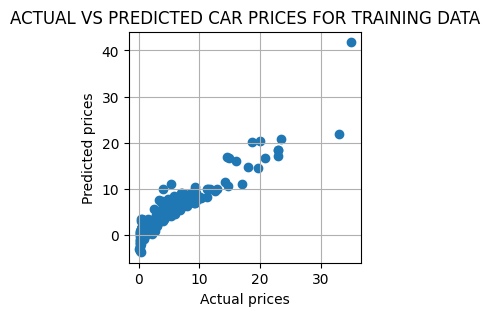

In [95]:
plt.figure(figsize=(3,3))  #fig size height and width
plt.scatter(Y_train,X_train_prediction_lin_reg_model)  #scatter plot between two numerical variable
plt.grid() # making grid of squared lines
plt.xlabel('Actual prices')  # x axis label
plt.ylabel('Predicted prices') # ya axis label
plt.title('ACTUAL VS PREDICTED CAR PRICES FOR TRAINING DATA')  #title of plot
plt.show() #show plot

Visualizing for Test Data

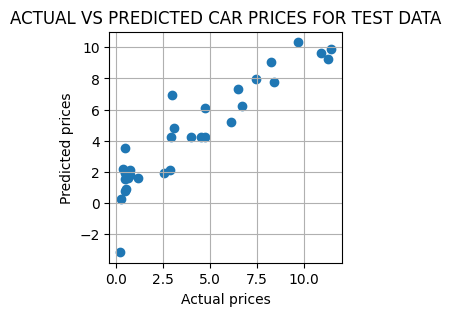

In [96]:
plt.figure(figsize=(3,3))
plt.scatter(Y_test,X_test_prediction_lin_reg_model)
plt.grid()
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('ACTUAL VS PREDICTED CAR PRICES FOR TEST DATA')
plt.show()

Training and Testing through Lasso Regression model

In [97]:
lasso_reg_model= Lasso()
lasso_reg_model.fit(X_train,Y_train)

Lasso()

Evaluating Lasso Regression Model

In [98]:
# Training data evaluation

In [99]:
X_train_prediction_lasso_reg_model= lasso_reg_model.predict(X_train)
# Using r squared metrics to find error
r_squared_score_lasso_reg_model= metrics.r2_score(X_train_prediction_lasso_reg_model,Y_train)
print('The r squared error is:',r_squared_score_lasso_reg_model)

The r squared error is: 0.798459024070425


In [100]:
#Using Mean absolute error
mean_absolute_error_lasso_reg_model=metrics.mean_absolute_error(X_train_prediction_lasso_reg_model,Y_train)
print('Mean_absolute_error:',mean_absolute_error_lasso_reg_model)

Mean_absolute_error: 1.2863097696916528


In [101]:
# Test data evaluation

In [102]:
X_test_prediction_lasso_reg_model= lasso_reg_model.predict(X_test)
# Using r squared metrics to find error
r_squared_score_lasso_reg_model_test_data= metrics.r2_score(X_test_prediction_lasso_reg_model,Y_test)
print('The r squared error is:',r_squared_score_lasso_reg_model_test_data)

The r squared error is: 0.7711110403265475


In [103]:
#Using Mean absolute error
mean_absolute_error_lasso_reg_model_test_data=metrics.mean_absolute_error(X_test_prediction_lasso_reg_model,Y_test)
print('Mean_absolute_error:',mean_absolute_error_lasso_reg_model_test_data)

Mean_absolute_error: 1.0507413774170433


Visualizing Actual prices and Predicted prices

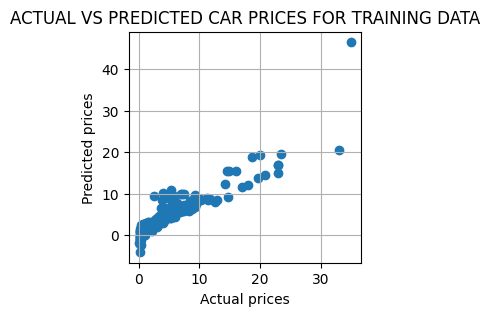

In [104]:
plt.figure(figsize=(3,3))
plt.scatter(Y_train,X_train_prediction_lasso_reg_model)
plt.grid()
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('ACTUAL VS PREDICTED CAR PRICES FOR TRAINING DATA')
plt.show()

Visualizing for Test Data

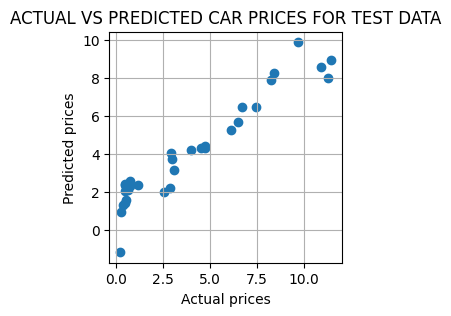

In [105]:
plt.figure(figsize=(3,3))
plt.scatter(Y_test,X_test_prediction_lasso_reg_model)
plt.grid()
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('ACTUAL VS PREDICTED CAR PRICES FOR TEST DATA')
plt.show()

Building a Predictive System

In [106]:
input_data=(2012,5.980,51439,1,0,0,0)  # input instance of data
input_data_as_numpy_array= np.array(input_data) # converting raw data into numpy array
data_reshaped=input_data_as_numpy_array.reshape(1,-1)  # reshaping instance for model
prediction=lin_reg_model.predict(data_reshaped)  #prediction of reshaped data
print('The Price of Car is',prediction)  #printing prediction

The Price of Car is [4.78985002]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [107]:
print(X_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

In [108]:
 # Hence we will use lasso regression that is more suitable here because it has less error as compared to linear regression